# Process data from a simulation of the infinite alleles model

Author: Juvid Aryaman


In [1]:
import mitonetworks.utls as utls
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker
from matplotlib.ticker import FormatStrFormatter
import warnings

In [2]:
warnings.simplefilter("ignore", UserWarning) # when generating svg's get lots of useless UserWarnings, so suppress them

In [3]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [4]:
utls.reset_plots()

In [5]:
n_arr = [100,
500,
1000,
1500,
2000]

In [6]:
symbols = ['-d','-o','-s','-^','-h','-P']
cm = plt.get_cmap("brg")
colors = (0.5+np.arange(0,len(n_arr)))/float(len(n_arr))
cvals = cm(colors)[::-1]

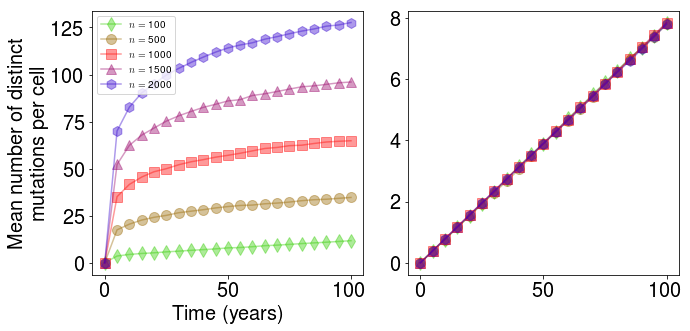

In [8]:
fig, axs = plt.subplots(1,2, figsize = (2*5,5))
axs = axs.ravel()
for i, n in enumerate(n_arr):
    symbol = symbols[np.mod(i,len(symbols))]
    
    data = pd.read_csv('output_{}.txt'.format(n), delimiter=',',skiprows=5)

    data['n_hom_mutants'] = data['n_mutants'] - data['n_het_mutants']

    g = data[['t','n_mutants','n_het_mutants','n_hom_mutants','mean_mutn_indiv','std_mutn_indiv']].groupby('t')

    means = g.mean()
    stds = g.std(ddof=1)
    
    
    ax = axs[0]
    ax.plot(means.index/365.0,means['n_mutants'], symbol,color=cvals[i], label = '$n=$ {}'.format(n), alpha = 0.4)
       

    ax = axs[1]    
    ax.plot(means.index/365.0,means['mean_mutn_indiv'], symbol,color=cvals[i], label = '$n=$ {}'.format(n), alpha = 0.4)
    #ax.set_xlabel('Time (years)')
    #ax.set_ylabel('Mean number of mutations\n per mtDNA')

axs[0].set_xlabel('Time (years)')
axs[0].set_ylabel('Mean number of distinct \nmutations per cell')

axs[0].legend(prop={'size':10}, loc = "upper left")    

#Make it look fancy
for ax in axs:
    fmt = matplotlib.ticker.StrMethodFormatter("{x}")
    ax.xaxis.set_major_formatter(fmt)
    ax.yaxis.set_major_formatter(fmt) 
    ax.xaxis.set_major_formatter(FormatStrFormatter('%d')) 
    ax.yaxis.set_major_formatter(FormatStrFormatter('%d')) 
            
plt.tight_layout()
plt.savefig('inf_sites_n.svg')